In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def eqn1(α,x):
    y=np.exp(-α*x)*np.cos(x)
    return y

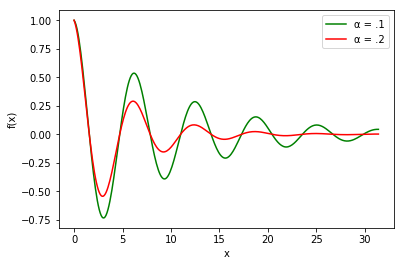

In [3]:
x = np.arange(0,10*np.pi,.1)
y=eqn1(.1,x)
y2=eqn1(.2,x)
plt.plot(x,y,'g',label=r'α = .1')
plt.plot(x,y2,'r',label=r'α = .2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend();

In [4]:
def psi(x,y,U=1,R=1):#no default values given
    r=(x**2+y**2)**(1/2)
    if(r < R):
        ψ=0
    else:
        θ2=np.arctan2(y,x)
        ψ=U*(r-R**2/r)*np.sin(θ2)
    return ψ
    

In [5]:
print(psi(2, 4, U=2, R=1.5))
print(psi(0.5, 0, U=2, R=1.5))#Checks out

7.1000000000000005
0


(-4.0, 4.0, -3.0, 3.0)

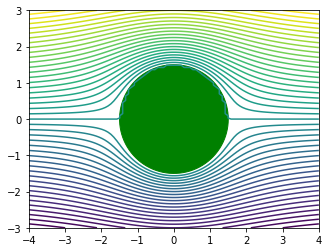

In [6]:
x,y = np.meshgrid( np.linspace(-4,4,100), np.linspace(-3,3,100) )
psivector = np.vectorize(psi)
plot = psivector(x, y, U=2, R=1.5)
plt.contour(x, y, plot, 50)
alpha = np.linspace(0, 2 * np.pi, 100)
plt.fill(1.5 * np.cos(alpha), 1.5 * np.sin(alpha), ec='g', fc='g')
plt.axis('scaled')

In [7]:
def ψ2(x,y,R2=1,U=1):
    r=np.sqrt(x**2+y**2)
    θ=x/r
    if(r > R2):
        vR=-U(1+(R2/r)**2)*np.sin(θ)
        vθ=U(1-(R2/r)**2)*np.cos(θ)
        vx=vR*np.cos(θ)-vθ*np.sin(θ)
        vy=vR*np.sin(θ)+vθ*np.cos(θ)
    else:
        vθ=0
        vR=0
        vx=0
        vy=0
    return vx,vy


In [8]:
print('v at (2,3): ', ψ2(2,3))

x,y = np.meshgrid(np.linspace(-4, 4, 50), np.linspace(-3, 3, 50))
vx, vy = np.zeros((50, 50)), np.zeros((50, 50))
R = 1.5
for i in range(50):
    for j in range(50):
        vx[i,j], vy[i,j] = velocity(x[i,j], y[i,j], U=2, R=R)
alpha = np.linspace(0, 2 * np.pi, 100)
plt.fill(R * np.cos(alpha), R * np.sin(alpha), ec='g', fc='g')
plt.streamplot(x, y, vx, vy)
plt.axis('scaled')

TypeError: 'int' object is not callable

In [18]:
def derFunc(x):
    if(x<0):
        der=-np.sin(x)
    else:
        der=-np.exp(-x)
    return der
v1=derFunc(1)
v2=derFunc(-1)
def func(x):
    if(x<0):
        f=np.cos(x)
    else :
        f=np.exp(-x)
    return f
val1=(func(1.0001)-func(.9999))/2/.0001
print('f(1) is approximately ', val1, 'compared to ', v1)
val2=(func(-.9999)-func(-1.0001))/2/.0001
print('f(-1) is approximately ', val2, 'compared to ', v2)

f(1) is approximately  -0.36787944178440224 compared to  -0.36787944117144233
f(-1) is approximately  0.841470983405368 compared to  0.8414709848078965


In [3]:
from scipy.special import erf
from scipy.optimize import fsolve
def Error(x,μ=0,σ=1,p=0):
    F=1/2*(1+erf((x-μ)/np.sqrt(2*σ**2)))
    return F-p
print(Error(2,2,1))
print(Error())
a = fsolve(Error, 3, args=(3, 2, 0.1))
b = fsolve(Error, 3, args=(3, 2, 0.9))
print(a,' is the x at which p = .1')
print(b,' is the x at which p = .9')

NameError: name 'np' is not defined

In [15]:
from scipy.integrate import quad

In [18]:
def func4(x):
    return np.exp(-x)

def func5(x):
    return np.exp(-x) / x
print('numerical integration of e^-x:', quad(func4, 1, 5))
print('analytic integration:', -np.exp(-5) + np.exp(-1))

print('numerical integration of e^-x/x:', quad(func5, 1, 5))
print('wolframalpha result:', 0.218236)

numerical integration of e^-x: (0.3611414941723568, 4.009476019776823e-15)
analytic integration: 0.36114149417235686
numerical integration of e^-x/x: (0.21823563880424607, 5.999095875237938e-09)
wolframalpha result: 0.218236
